<center><h2>Artificial and Computational Intelligence (Assignment - 2)</h2></center>

## Problem Statement

As part of the 2nd Assignment, we'll implement Bayesian Networks and also learn to use the pomegranate library.

You are required to create a bayesian network model which would help you predict the probability. The detailed problem description is attached as a PDF as a part of this assignment along with the marking scheme.  

### What is a Bayesian Network ?

A Bayesian network, Bayes network, belief network, decision network, Bayes(ian) model or probabilistic directed acyclic graphical model is a probabilistic graphical model (a type of statistical model) that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. Given symptoms, the network can be used to compute the probabilities of the presence of various diseases. 

### Dataset

The dataset can be downloaded from https://drive.google.com/drive/folders/1oMtKmmvPkN4O8DmrHMJe6M8CbB93Z5kw .You can access it only using your BITS IDs. Also, the same dataset is attached along with the assignment. 

#### Dataset Description
##### Sample Tuple

Y	won	5wickets	lost	2nd	vWest_Indies	Home	6-Nov-11

##### Explanation
- The first column represents if Ashwin was in the playing 11 or not. 
- The second column represents the Result of the match . win indicates India won the match.
- The third column represents the Margin of victory / losss.
- The fourth column represents the results of the toss. won indicates India won the toss. 
- The fifth column represents the batting order. If India batted 1st or 2nd. 
- The sixth column represents the opponent.
- The seventh column represents the location of the match. If the match was held in Home(India) or away. 
- The last column represents the start date of the match.


### Evaluation
We wish to evaluate based on 
- coding practices being followed
- commenting to explain the code and logic behind doing something
- your understanding and explanation of data
- how good the model would perform

# BITS RollNumbers , Names. 
### 2018AH04563, PARUPALLI SRINIVASA DINESH
### 2018AH04509, SWETHA MUTHYALA

#### <font  color='red'> As latest version(.12) of pomegranate library is having issues while using model.probability() so using .11 version of it.

In [1]:
!pip install pomegranate==0.11.2 --force-reinstall --user

  Using cached https://files.pythonhosted.org/packages/8b/c0/022e74c1a4517ce6a7b835e456d96a81e3e249e1870f933acd1558446fad/pomegranate-0.11.2-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/a9/38/f6d6d8635d496d6b4ed5d8ca4b9f193d0edc59999c3a63779cbc38aa650f/numpy-1.18.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/41/8f/dd6a8e85946def36e4f2c69c84219af0fa5e832b018c970e92f2ad337e45/networkx-2.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9e/9c/d4865f9b24c7cfe83181e892ec5ade1435cde46bc606bb5ac2b297d75c38/PyYAML-5.3-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/28/5c/cf6a2b65a321c4a209efcdf64c2689efae2cb62661f8f6f4bb28547cf1bf/joblib-0.14.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/61/51/046cbc61c7607e5ecead6ff1a9453fba5e7e47a5ea8d608cc7036586a5ef/scipy-1.4.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/pa

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install pandas==0.25.1 --force-reinstall --user

  Using cached https://files.pythonhosted.org/packages/b1/69/fcc29820befae2b96fd0b01225577af653e87cd0914634bb2d372a457bd7/pandas-0.25.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/a9/38/f6d6d8635d496d6b4ed5d8ca4b9f193d0edc59999c3a63779cbc38aa650f/numpy-1.18.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/e7/f9/f0b53f88060247251bf481fa6ea62cd0d25bf1b11a87888e53ce5b7c8ad2/pytz-2019.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl
  Found existing installation: numpy 1.18.1
    Uninstalling numpy-1.18.1:
      Successfully uninstalled numpy-1.18.1
  Found existing installation: pytz 2019.3
    Uninstalling pytz-2019.3:
      Success

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
#Import libraries
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sb; 
sb.set_style('whitegrid')
import pandas as pd
import numpy as np
import os
import pprint
import itertools
from pomegranate import *

In [4]:
class BayesNet:
    def __init__(self, fileName = 'India_Test_Stats.xlsx'):
        """ 
        Constructor. 
  
        Parameters: 
        args(0): fileName = Name of the file.
  
        Returns: 
        
        """
        directoryPath = os.getcwd()
        filePath = directoryPath + '\\' + fileName
        self.indanStatsDf = pd.read_excel (filePath)

        self.prioriProbs = {}
        self.conditionalProbs = {}
        self.CPT = []
        hypothesis = None
    
    def preprocessData(self):
        """This function would perform data Pre-Processing

        Args: No arguments
            
        Returns: Void
            
        """
        # remove the Margin, Start Date, Opposition fields. These are not required.
        self.indanStatsDf.drop(['Margin', 'Start Date', 'Opposition'], axis = 1, inplace = True)
    
    def computePriorProbabilities(self, featureAttribute = None):
        """This function would calculate the prior probabilities

        Args: 
        args(0): Feature Attribute Name
            
        Returns: Void
            
        """
        
        self.prioriProbs = {}
        
        # Get specific feature prior probability else get all the feature prior probabilities
        if (featureAttribute is not None):
            featureValues = list(set(self.indanStatsDf[featureAttribute]))
            featureData = list(self.indanStatsDf[featureAttribute])
            for i in featureValues:
                for j in featureData:
                    indexer = featureAttribute + '=' + j                    
                    self.prioriProbs[indexer]  = featureData.count(i)/float(len(featureData))
        else:
            featureValues = list(set(self.indanStatsDf))
            for i in featureValues:
                featureData =  list(self.indanStatsDf[i])
                for j in featureData:
                    indexer = i + '=' + j                    
                    self.prioriProbs[indexer]  = round(featureData.count(j)/float(len(featureData)), 3)
        
        # Display the dictionary
        pprint.pprint(self.prioriProbs)
    
    def cartiseanProductForDic(self, **kwargs):
        """This function would create the CPT(Conditional Probabilities Table)

        Args: 
        args(0): takes dictionary and returns cartsian product with dictinary values
            
        Returns: Void
            
        """
        keys = kwargs.keys()
        vals = kwargs.values()
        for instance in itertools.product(*vals):
            yield dict(zip(keys, instance))
                
    def computeCP(self, featureData, featureClass, featureValue):
        """This function would fetch feature data as per the class name and atttribute

        Args: 
        args(0): featureData - Feature data 
        args(1): featureClass - class/feature name
        args(2): featureValue - feature attribute value
            
        Returns: list of conditional feature array
            
        """
        featureData = featureData[featureData[featureClass] == featureValue]
        
        return featureData
    
    def getValuesOfDictionary(self, dic, prob):
        """This function is helper method to get list of values of a dictionary

        Args: 
        args(0): dic - dictionary 
        args(1): prob - probability value
            
        Returns: list of values to be used in CPT
            
        """
        cps = [] 
        for value in dic.values(): 
            cps.append(value) 
        cps.append(prob)
        return cps
    
    def createCPT(self, *features):
        """This function would create the CPT(Conditional Probabilities Table)

        Args: 
        args(0): Feature Attribute Name. For E.g: Location
        args(1): Feature Attribute Name. For E.g: Ashwin
            
        Returns: Void
            
        """
        featureAttrValues = {}
        featureAttrbs = ''
        for i in range(0, len(features)):
            featureAttrbs += features[i] + '_'
            featureAttrValues.update({features[i]: list(set(self.indanStatsDf[features[i]]))})
        featureAttrbs = featureAttrbs[:-1]
        
        hypothesis = list(self.cartiseanProductForDic(**featureAttrValues))
        initialLen = 1
        tempConditionaProbs = []
        for i in range(0, len(hypothesis)):
            featureData = []
            isInitial = True
            for item in hypothesis[i].items():
                if(len(featureData) == 0 and isInitial):
                    featureData = self.computeCP(self.indanStatsDf, item[0], item[1])
                    initialLen = len(featureData)
                    isInitial = False
                else:
                    featureData = self.computeCP(featureData, item[0], item[1])
            
            prob = round(float(len(featureData)/initialLen), 3)
            tempConditionaProbs.append(self.getValuesOfDictionary(hypothesis[i], prob))
            self.CPT.append(self.getValuesOfDictionary(hypothesis[i], prob))
            prob = 0
            self.conditionalProbs.update({featureAttrbs: tempConditionaProbs})
#         return self.CPT
    
    def getCPT(self, *values):
        """This function would fetch CPTs using dictionary key

        Args: 
        args(1): Dynamic variable
            
        Returns: returns CPT as per the parameter
            
        """
        cps = []
        for i in range(0, len(values)):
            temp = self.conditionalProbs[values[i]]
            for j in range(0, len(temp)):
                cps.append(temp[j])
            
        return cps

## Data Loading, Exploration (Investigation) and Pre-Processing

##### Initialization along with reading of the data file

In [5]:
bayesNet = BayesNet()

bayesNet.indanStatsDf.head()

,Ashwin,Result,Margin,Toss,Bat,Opposition,Location,Start Date
0,Y,won,5 wickets,lost,2nd,v West Indies,Home,2011-11-06
1,Y,won,inns & 15 runs,won,1st,v West Indies,Home,2011-11-14
2,Y,draw,-,lost,2nd,v West Indies,Home,2011-11-22
3,Y,lost,122 runs,lost,2nd,v Australia,Away,2011-12-26
4,Y,lost,inns & 68 runs,won,1st,v Australia,Away,2012-01-03


###### Preprocessing data

In [6]:
bayesNet.indanStatsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 8 columns):
Ashwin        85 non-null object
Result        85 non-null object
Margin        85 non-null object
Toss          85 non-null object
Bat           85 non-null object
Opposition    85 non-null object
Location      85 non-null object
Start Date    85 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(7)
memory usage: 5.4+ KB


In [7]:
bayesNet.indanStatsDf.shape

(85, 8)

In [8]:
bayesNet.preprocessData()

###### After dropping features which are not required

In [9]:
bayesNet.indanStatsDf.head()

,Ashwin,Result,Toss,Bat,Location
0,Y,won,lost,2nd,Home
1,Y,won,won,1st,Home
2,Y,draw,lost,2nd,Home
3,Y,lost,lost,2nd,Away
4,Y,lost,won,1st,Away


In [10]:
# Check for null values
bayesNet.indanStatsDf.isnull().values.any()

False

In [11]:
# Check for null values in each feature
bayesNet.indanStatsDf.isnull().sum() 

Ashwin      0
Result      0
Toss        0
Bat         0
Location    0
dtype: int64

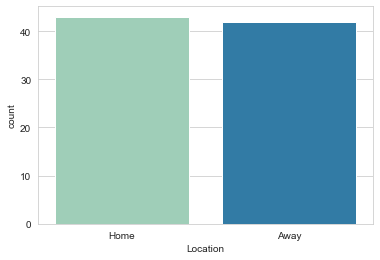

In [12]:
sb.countplot(x='Location', data = bayesNet.indanStatsDf, palette='YlGnBu')

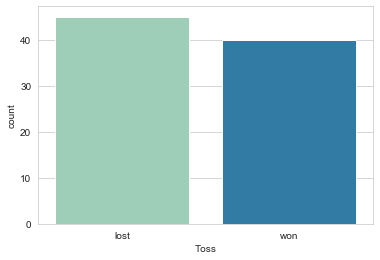

In [13]:
sb.countplot(x='Toss', data = bayesNet.indanStatsDf, palette='YlGnBu')

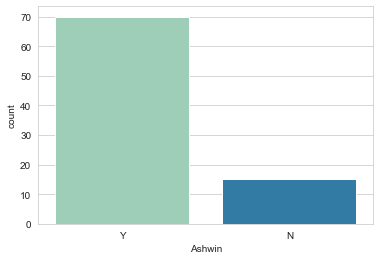

In [14]:
sb.countplot(x='Ashwin', data = bayesNet.indanStatsDf, palette='YlGnBu')

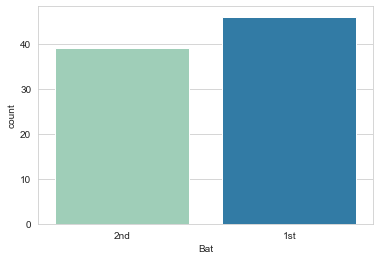

In [15]:
sb.countplot(x='Bat', data = bayesNet.indanStatsDf, palette='YlGnBu')

##### Our Analysis on the assignment and we created the graph manually as per our understanding.

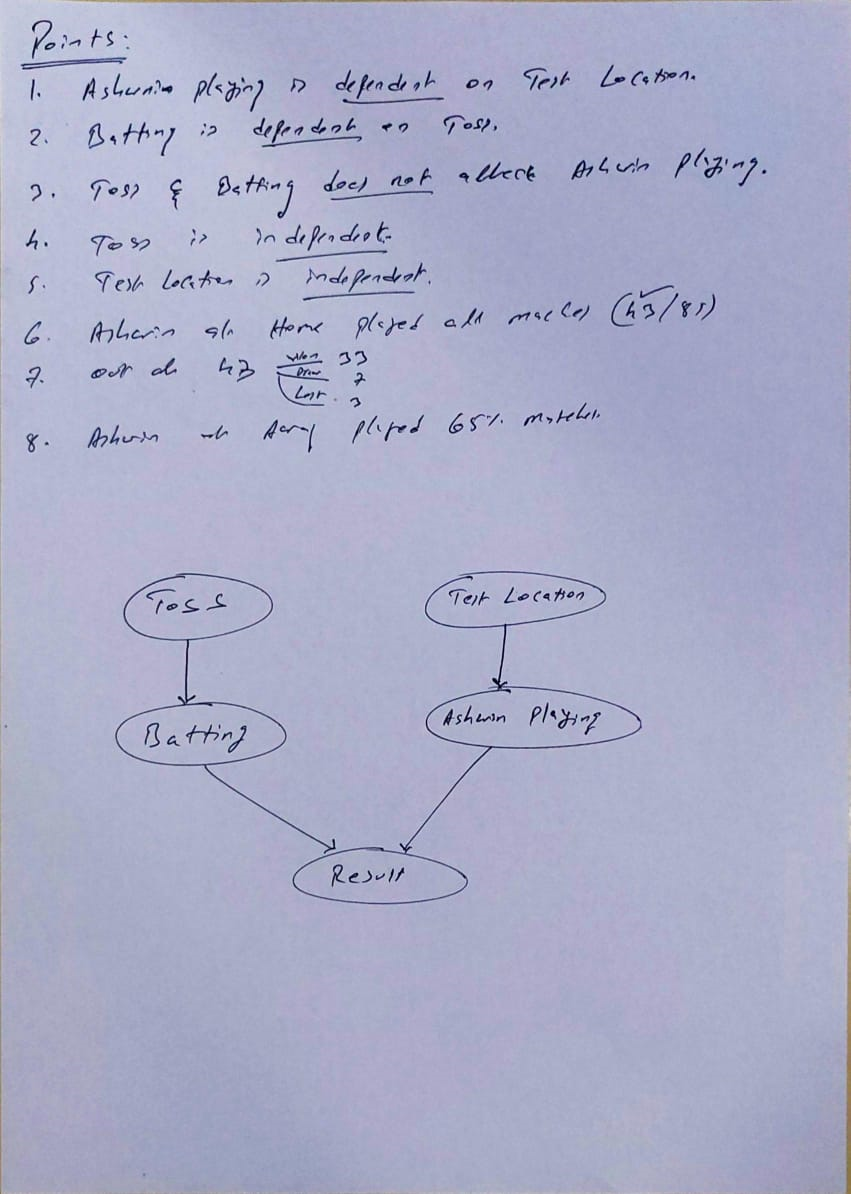

## <font color='blue' > Solution for part 1 </font> 

##### computePriorProbabilities() can take either feature or none. 
    - If feature is given then it will calculate for Prior Probability for that feature only. 
    - If nothing is passed, it will calculate  Prior Probabilities for all the features.

In [16]:
# Compute and Display Prior Probabilities for a specific variable
bayesNet.computePriorProbabilities('Ashwin')

{'Ashwin=N': 0.8235294117647058, 'Ashwin=Y': 0.8235294117647058}


In [17]:
# Compute and Display Prior Probabilities for a all variables
bayesNet.computePriorProbabilities()

{'Ashwin=N': 0.176,
 'Ashwin=Y': 0.824,
 'Bat=1st': 0.541,
 'Bat=2nd': 0.459,
 'Location=Away': 0.494,
 'Location=Home': 0.506,
 'Result=draw': 0.188,
 'Result=lost': 0.259,
 'Result=won': 0.553,
 'Toss=lost': 0.529,
 'Toss=won': 0.471}


## <font color='blue' > Solution for part 2 </font> 

###### Conditional Probability Table

In [18]:
bayesNet.createCPT('Location', 'Ashwin')

In [19]:
bayesNet.CPT

[['Away', 'N', 0.357],
 ['Away', 'Y', 0.643],
 ['Home', 'N', 0.0],
 ['Home', 'Y', 1.0]]

##### Create the distributions which live in each node in the graph

In [20]:
bayesNet.CPT = []
bayesNet.conditionalProbs = {}

In [21]:
bayesNet.createCPT('Location', 'Ashwin')

bayesNet.createCPT('Toss', 'Bat')

bayesNet.createCPT('Ashwin', 'Bat', 'Result')

### Below would be used for the Conditional Distributions

##### CPT for Location with Ashwin used in ashwinDistribution

In [22]:
bayesNet.getCPT('Location_Ashwin')

[['Away', 'N', 0.357],
 ['Away', 'Y', 0.643],
 ['Home', 'N', 0.0],
 ['Home', 'Y', 1.0]]

##### CPT for Toss with Bat used in batDistribution

In [23]:
bayesNet.getCPT('Toss_Bat')

[['won', '1st', 0.9],
 ['won', '2nd', 0.1],
 ['lost', '1st', 0.222],
 ['lost', '2nd', 0.778]]

##### CPT for Ashwin with Bat with Result used in resultDistribution

In [24]:
bayesNet.getCPT('Ashwin_Bat_Result') 

[['N', '1st', 'won', 0.333],
 ['N', '1st', 'lost', 0.133],
 ['N', '1st', 'draw', 0.133],
 ['N', '2nd', 'won', 0.0],
 ['N', '2nd', 'lost', 0.333],
 ['N', '2nd', 'draw', 0.067],
 ['Y', '1st', 'won', 0.371],
 ['Y', '1st', 'lost', 0.1],
 ['Y', '1st', 'draw', 0.057],
 ['Y', '2nd', 'won', 0.229],
 ['Y', '2nd', 'lost', 0.114],
 ['Y', '2nd', 'draw', 0.129]]

### Just to check we have all the values in the CPT.
1. CPTs are stored in two variables
    - CPT[] : This is an array object, which will hold have all the CPT values
    - conditionalProbs : This is dictionary object, which will hold the CPTs in key, values pairs

In [25]:
print('-----------CPT[] Starts----------------')
pprint.pprint(bayesNet.CPT)
print('-----------CPT[] Ends-----------------')
print('--------------------------------------\n')
print('-----------conditionalProbs Starts---------------')
pprint.pprint(bayesNet.conditionalProbs)
print('-----------conditionalProbs Ends---------------')

-----------CPT[] Starts----------------
[['Away', 'N', 0.357],
 ['Away', 'Y', 0.643],
 ['Home', 'N', 0.0],
 ['Home', 'Y', 1.0],
 ['won', '1st', 0.9],
 ['won', '2nd', 0.1],
 ['lost', '1st', 0.222],
 ['lost', '2nd', 0.778],
 ['N', '1st', 'won', 0.333],
 ['N', '1st', 'lost', 0.133],
 ['N', '1st', 'draw', 0.133],
 ['N', '2nd', 'won', 0.0],
 ['N', '2nd', 'lost', 0.333],
 ['N', '2nd', 'draw', 0.067],
 ['Y', '1st', 'won', 0.371],
 ['Y', '1st', 'lost', 0.1],
 ['Y', '1st', 'draw', 0.057],
 ['Y', '2nd', 'won', 0.229],
 ['Y', '2nd', 'lost', 0.114],
 ['Y', '2nd', 'draw', 0.129]]
-----------CPT[] Ends-----------------
--------------------------------------

-----------conditionalProbs Starts---------------
{'Ashwin_Bat_Result': [['N', '1st', 'won', 0.333],
                       ['N', '1st', 'lost', 0.133],
                       ['N', '1st', 'draw', 0.133],
                       ['N', '2nd', 'won', 0.0],
                       ['N', '2nd', 'lost', 0.333],
                       ['N', '2nd', 'draw

## <font color='blue' > Solution for part 3 </font> 

##### Create DiscreteDistribution & CPTs

In [26]:
locationDistribution = DiscreteDistribution({'Home':bayesNet.prioriProbs['Location=Home'],'Away': bayesNet.prioriProbs['Location=Away']})

ashwinDistribution = ConditionalProbabilityTable(bayesNet.getCPT('Location_Ashwin'), [locationDistribution])

tossDistribution = DiscreteDistribution({'won':bayesNet.prioriProbs['Toss=won'],'lost': bayesNet.prioriProbs['Toss=lost']})

batDistribution = ConditionalProbabilityTable(bayesNet.getCPT('Toss_Bat'), [tossDistribution])

resultDistribution = ConditionalProbabilityTable(bayesNet.getCPT('Ashwin_Bat_Result'),
                                              [ashwinDistribution, batDistribution])

In [27]:
# # State objects hold both the distribution, and a high level name.
state_location = State(locationDistribution, name="location")
state_toss = State(tossDistribution, name="toss")

state_ashwin = State(ashwinDistribution, name="ashwin")
state_bat = State(batDistribution, name="bat")

state_result = State(resultDistribution, name="result")

In [28]:
# Create the Bayesian network object with a useful name
bayesianNetwork = BayesianNetwork("Spinning the Bayes Net Problem for Ashwin Playing")

bayesianNetwork.add_states(state_location, state_toss, state_ashwin, state_bat, state_result )

In [29]:
# Add edges which represent conditional dependencies, where the second node is 
# conditionally dependent on the first node
bayesianNetwork.add_edge( state_location, state_ashwin)
bayesianNetwork.add_edge( state_ashwin, state_result)

bayesianNetwork.add_edge( state_toss, state_bat)
bayesianNetwork.add_edge( state_bat, state_result)

In [30]:
bayesianNetwork.bake()

##### The model graph's edges are:

In [31]:
bayesianNetwork.graph.edges

[(0, 1), (2, 3), (4, 5), (6, 7), (8, 9), (0, 5), (4, 9), (2, 7), (6, 9)]

In [32]:
print(bayesianNetwork.structure)

((), (), (0,), (1,), (2, 3))


## <font color='blue' > Solution for part 4 </font> 

In [33]:
print (bayesianNetwork.predict_proba({}))

[{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Home" :0.5050404897509624,
            "Away" :0.4949595102490376
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "won" :0.49826242878392013,
            "lost" :0.5017375712160799
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Y" :0.822080156243996,
            "N" :0.1779198437560039
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "1st" :0.5814080187474866,
            "2nd" :0.4185919812525135
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"

In [34]:
# a) India winning, batting 2nd, Ashwin playing
print (bayesianNetwork.predict_proba({'result':'won', 'bat': '2nd', 'ashwin': 'Y'}))

[{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Home" :0.6143445817478952,
            "Away" :0.3856554182521047
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "won" :0.10268999829940147,
            "lost" :0.8973100017005985
        }
    ],
    "frozen" :false
}
 'Y' '2nd' 'won']


In [35]:
# b) India winning, batting 2nd, Ashwin not playing
print (bayesianNetwork.predict_proba({'result':'won', 'bat': '2nd', 'ashwin': 'N'}))

[{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Home" :0.506,
            "Away" :0.494
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "won" :0.471,
            "lost" :0.5289999999999999
        }
    ],
    "frozen" :false
}
 'N' '2nd' 'won']


In [36]:
# c) India losing, batting 2nd, Ashwin playing
print (bayesianNetwork.predict_proba({'result':'lost', 'bat': '2nd', 'ashwin': 'Y'}))

[{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Home" :0.6143445817478952,
            "Away" :0.3856554182521047
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "won" :0.10268999829940147,
            "lost" :0.8973100017005985
        }
    ],
    "frozen" :false
}
 'Y' '2nd' 'lost']


In [37]:
# d) India losing, batting 2nd, Ashwin not playing
print (bayesianNetwork.predict_proba({'result':'lost', 'bat': '2nd', 'ashwin': 'N'}))

[{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Home" :0.0,
            "Away" :1.0
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "won" :0.10268999829940147,
            "lost" :0.8973100017005985
        }
    ],
    "frozen" :false
}
 'N' '2nd' 'lost']


##### Probabilities

In [38]:
# a) India winning, batting 2nd, Ashwin playing
print(bayesianNetwork.probability([None, None, 'Y', '2nd', 'won']))

0.229


In [39]:
# b) India winning, batting 2nd, Ashwin not playing
print(bayesianNetwork.probability([None, None, 'N', '2nd', 'won']))

0.0


In [40]:
# c) India losing, batting 2nd, Ashwin playing
print(bayesianNetwork.probability([None, None, 'Y', '2nd', 'lost']))

0.114


In [41]:
# d) India losing, batting 2nd, Ashwin not playing
print(bayesianNetwork.probability([None, None, 'N', '2nd', 'lost']))

0.333


### Conclusion


#### Assumptions made


1) Dropped the Margin, Start Date, Opposition columns. These are not making any significant contubition to problem statement.<br>
2) As latest version(.12) of pomegranate library is having issues while using model.probability() so using .11 version of it.<br>
3) Document reffered https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_4_Bayesian_Networks.ipynb


#### Inferences and understanding on the assignment mainly on Bayesian Belief Networks

1) We have used the plain class and methods to implement this problem. <br>
2) Bayesian Belief Networks (Bayesian Networks), are a natural generalization of these kinds of inferences to multiple events or random processes that depend on each other.<br>
3) Bayesian Networks are represened as directed graphs in which each node is a hypothesis or a random process. In other words, something that takes at least 2 possible values you can assign probabilities to.<br>
4) The arrows between nodes represent the conditional probabilities between them — how information about the state of one node changes the probability distribution of another node it’s connected to.<br>
5) Bayesian Belief Networks are a convenient mathematical way of representing probabilistic (and often causal) dependencies between multiple events or random processes.<br>
6) A Bayesian Network consists of nodes connected with arrows.<br>
7) Each node represents a set of mutually exclusive events which cover all possibilities for the node.<br>
8) Nodes send probabilistic information to their parents and children according to the rules of probability theory (more specifically, according to Bayes’ theorem).<br>

<font color='blue'>__We further understood on Bayesian Networks:__</font><br>
There are two ways in which information can flow within a Bayesian network are:<br><br>
1) Predictive propagation, where information follows the arrows and knowledge about parent nodes changes the probability distributions of their children. <br>
2) Retrospective propagation, where information flows in a direction opposite to the direction of the arrows and children update the probability distributions of their parents.

<h3><center> Happy Coding!</center></h3>